# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [111]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cmocean

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv("C:\\Users\\Sara\\Ironhack lectures\\lab-matplotlib-seaborn\\data\\Fitbit2.csv")

In [3]:
#To visualize de first 5 rows 
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

C:\Users\Sara\AppData\Local\Temp\ipykernel_18628\3249652266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_steps = sns.barplot(x="Months_encoded", y="Steps", data=fitbit, palette="rocket")


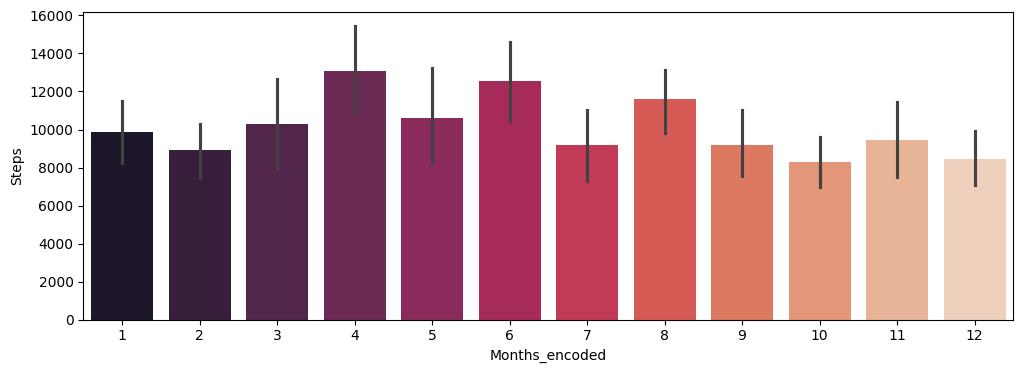

In [5]:
# AVERAGE STEPS BY MONTH_ENCODED
plt.figure(figsize=(12, 4))
barplot_steps = sns.barplot(x="Months_encoded", y="Steps", data=fitbit, palette="rocket");
barplot_steps.figure.savefig("barplot_steps.jpg", dpi=1000)

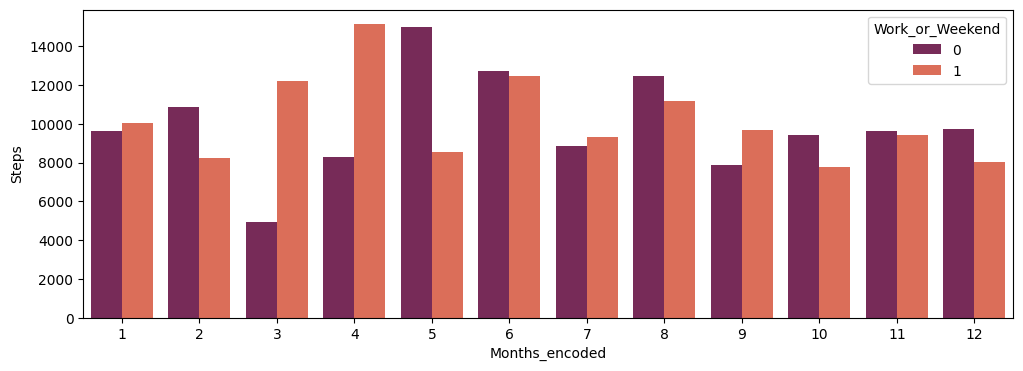

In [18]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
plt.figure(figsize=(12, 4))
grouped_data = fitbit.groupby(["Work_or_Weekend", "Months_encoded"])["Steps"].mean().reset_index()

# Create a bar plot
wwbarplot_steps = sns.barplot(x="Months_encoded", y="Steps", hue="Work_or_Weekend", data=grouped_data, palette="rocket");
wwbarplot_steps.figure.savefig("wwbarplot_steps.jpg", dpi=1000)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

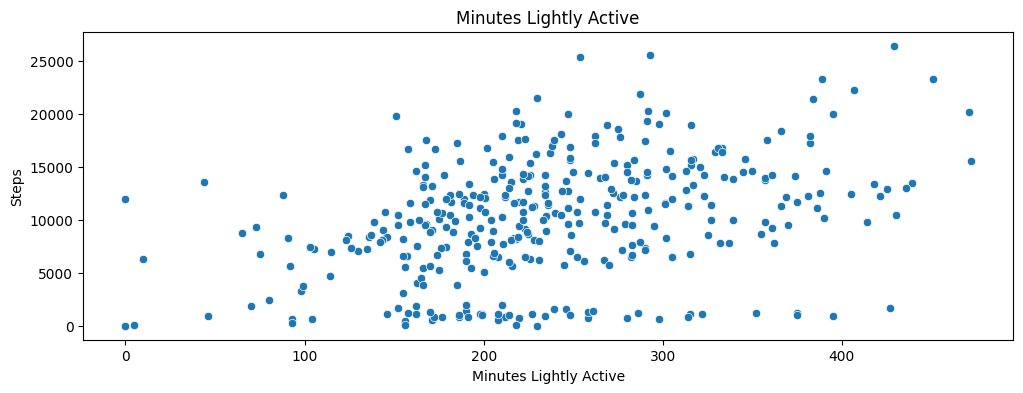

<Figure size 640x480 with 0 Axes>

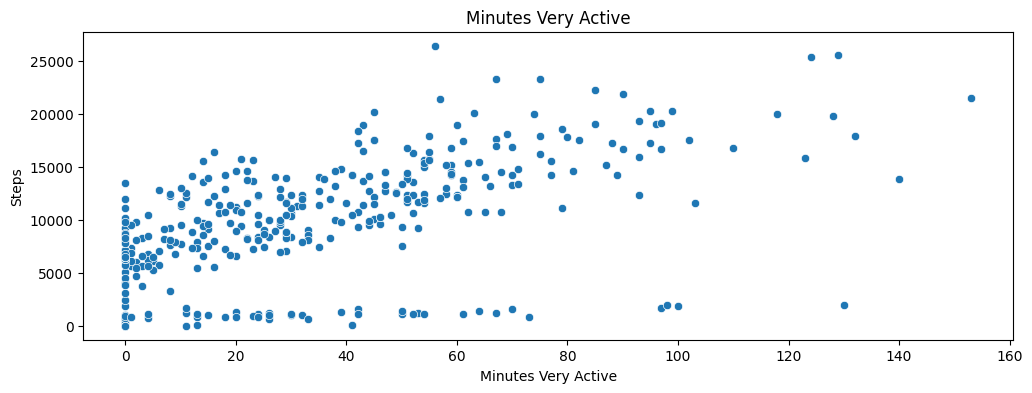

<Figure size 640x480 with 0 Axes>

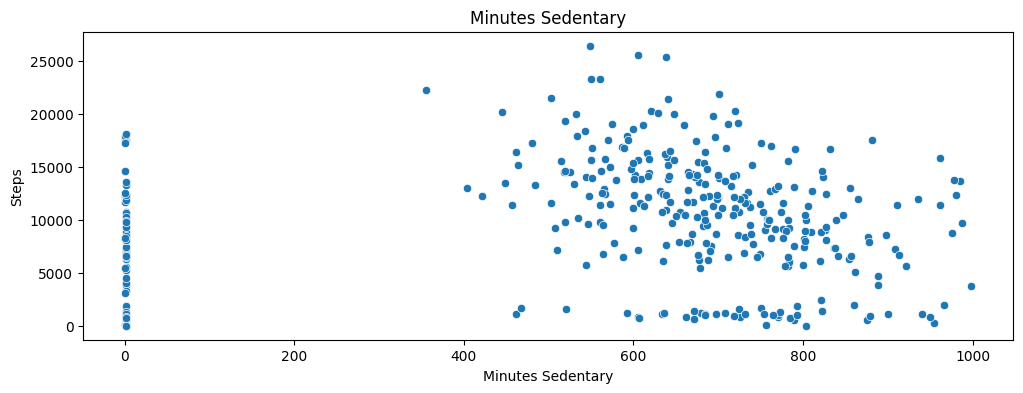

<Figure size 640x480 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [32]:
plt.figure(figsize=(12, 4))
features = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]
for i in features:
    plt.title(i)
    sns.scatterplot(x=fitbit[i], y=fitbit["Steps"]);
    plt.figure()
    plt.figure(figsize=(12, 4))
    



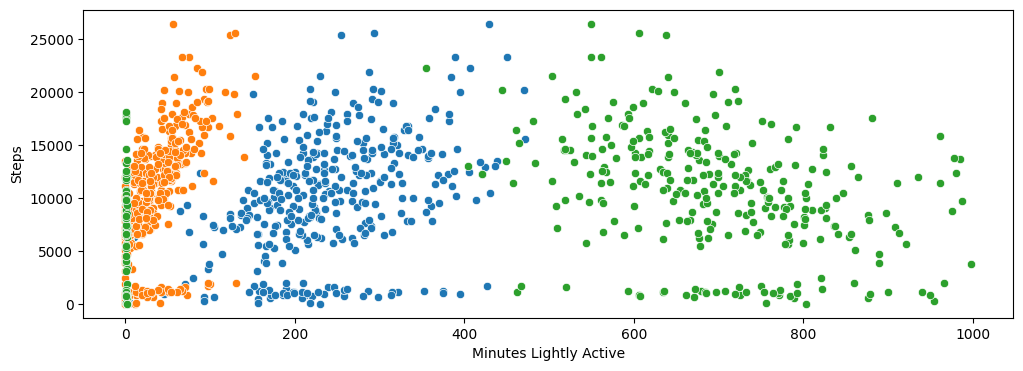

In [52]:
plt.figure(figsize=(12, 4))
features = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]

for feature in features:
    sns.scatterplot(x=fitbit[feature], y=fitbit["Steps"])

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [53]:
titanic = pd.read_csv("C:\\Users\\Sara\Ironhack lectures\\lab-matplotlib-seaborn\\data\\titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [54]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [55]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include= ["int64", "float64"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [74]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include= "object")
#Notes: Name shoud not be included in categorical, as well as the Ticket column. 

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [75]:
plt.figure(figsize=(12, 4))
plt.style.use('classic')

<Figure size 1200x400 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

<Axes: xlabel='Age', ylabel='Count'>

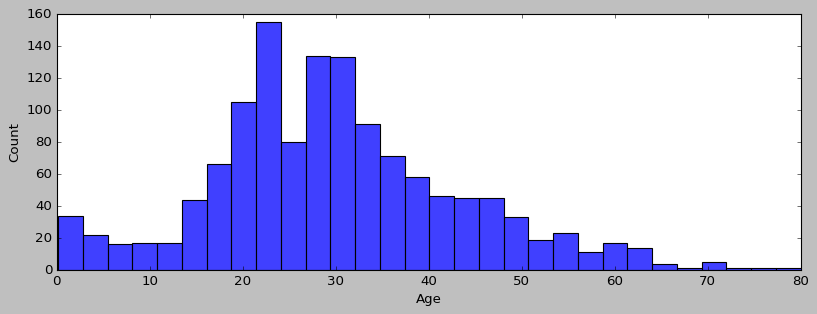

In [117]:
plt.figure(figsize=(12, 4))
sns.histplot(x=titanic.Age, color="blue")

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

Text(0.5, 1.0, 'Bins = 50')

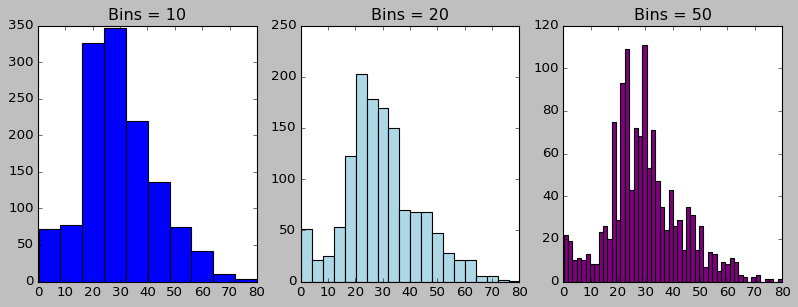

In [115]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#bins=10
axes[0].hist(titanic['Age'], bins=10, color='blue', edgecolor='black')
axes[0].set_title('Bins = 10')

#bins=20
axes[1].hist(titanic['Age'], bins=20, color='lightblue', edgecolor='black')
axes[1].set_title('Bins = 20')

#bins=50
axes[2].hist(titanic['Age'], bins=50, color='purple', edgecolor='black')
axes[2].set_title('Bins = 50')

#### How does the bin size affect your plot?

In [118]:
"""
The bins are the size of each bar. As the size decrease (bin = 10), the greater amount of data is contained inside the bar. So if we want to assess a feature in detail, then we should use a bigger size of bin (bin = 50).
"""

'\nThe bins are the size of each bar. As the size decrease (bin = 10), the greater amount of data is contained inside the bar. So if we want to assess a feature in detail, then we should use a bigger size of bin (bin = 50).\n'

#### Use seaborn to show the distribution of column `Age`.

<Axes: xlabel='Age', ylabel='Count'>

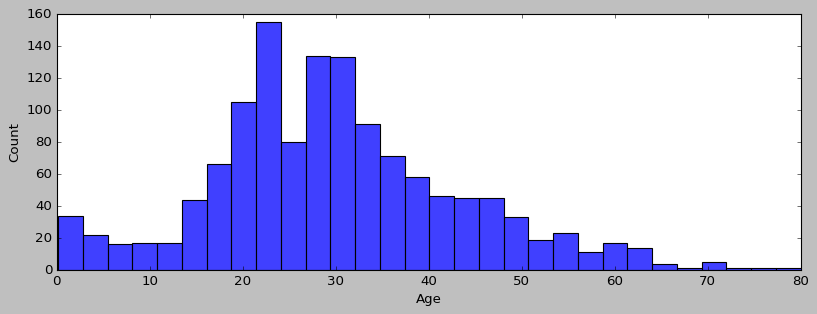

In [142]:
plt.figure(figsize=(12, 4))
sns.histplot(titanic["Age"], color= "blue")

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<Axes: xlabel='Gender'>

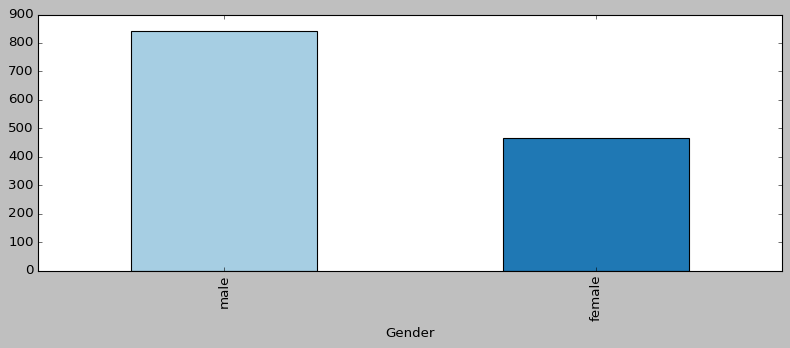

In [143]:
# Method 1 - matplotlib
plt.figure(figsize=(12, 4))
unique_genders = titanic['Gender'].unique()
colors = plt.cm.Paired(np.arange(len(unique_genders)))
titanic['Gender'].value_counts().plot(kind='bar', color=colors)


C:\Users\Sara\AppData\Local\Temp\ipykernel_18628\698800308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=titanic.Gender, palette="rocket")


<Axes: xlabel='Gender', ylabel='count'>

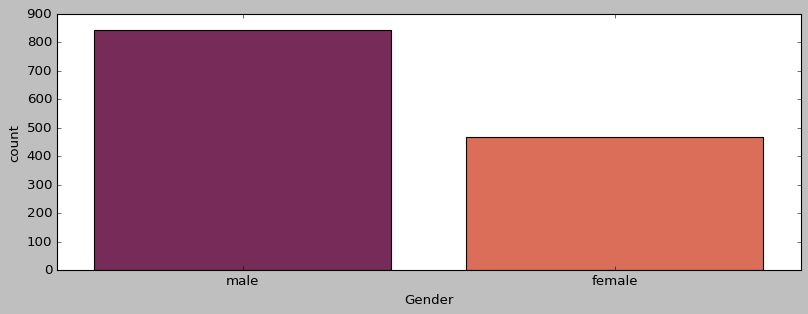

In [144]:
# Method 2 - seaborn
plt.figure(figsize=(12, 4))
sns.countplot(x=titanic.Gender, palette="rocket")

#### Use the right plot to visualize the column `Pclass`.

C:\Users\Sara\AppData\Local\Temp\ipykernel_18628\346890681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=titanic, palette='rocket')


<Axes: xlabel='Pclass', ylabel='count'>

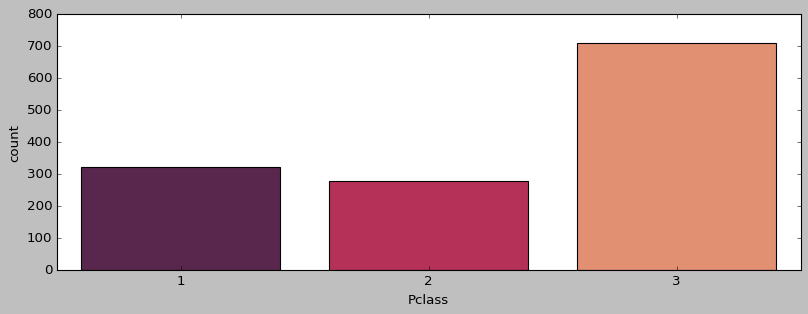

In [145]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Pclass', data=titanic, palette='rocket')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<Axes: xlabel='Age', ylabel='Count'>

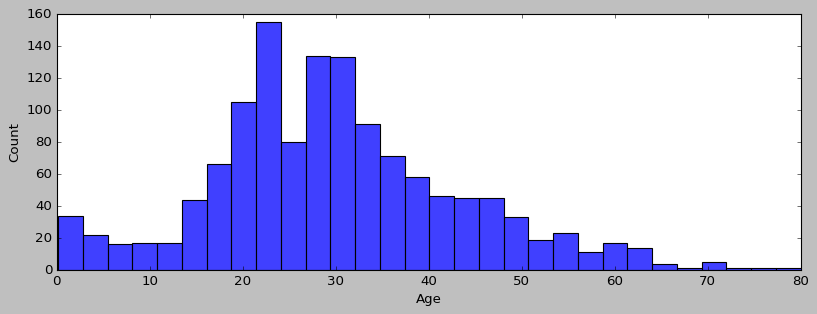

In [146]:
plt.figure(figsize=(12, 4))
sns.histplot(titanic["Age"])

#### What does the last plot tell you about the feature `Age`?

In [138]:
"""
In the histogram age plot we can se the distribution of the column "Age". 
A higher bar means a higher count of people in that range of age.  
In this dataset, most passangers are between the 20 and 40 years old. 
"""

'\nIn the histogram age plot we can se the distribution of the column "Age". \nA higher bar means a higher count of people in that range of age.  \nIn this dataset, most passangers are between the 20 and 40 years old. \n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<Axes: xlabel='Age'>

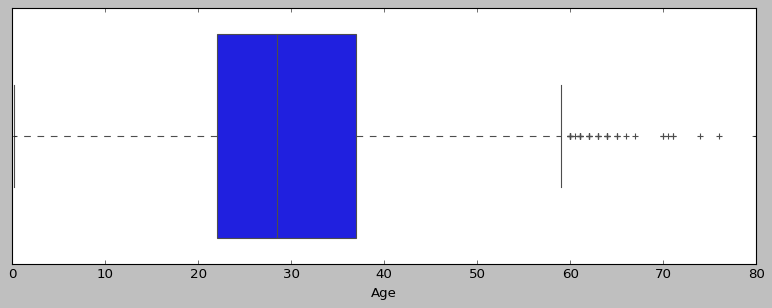

In [147]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=titanic['Age'], color='blue')

#### What additional information does the last plot provide about feature `Age`?

In [141]:
"""
The graphic from above is a boxplot (also known as whisket plot), which also shows the distribution of ages, but in anotherway. 
In this case, the box (from Q1 to Q3) indicates the range that represents half of the data, with a line (Q2) inside of it which is the median value.
The lines from outside the box represents the rest of the data. 
Also, as it can be seen from 60 to 80, there are "+" signs which represent the outleirs datapoints.
Finally, it tell us the type of distribution it has. I think it is a skewed type as it is not symmetric and datapoints are possition in the left side of the plot.
"""

'\nThe graphic from above is a boxplot (also known as whisket plot), which also shows the distribution of ages, but in anotherway. \nIn this case, the box (from Q1 to Q3) indicates the range that represents half of the data, with a line (Q2) inside of it which is the median value.\nThe lines from outside the box represents the rest of the data. \nAlso, as it can be seen from 60 to 80, there are "+" signs which represent the outleirs datapoints.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

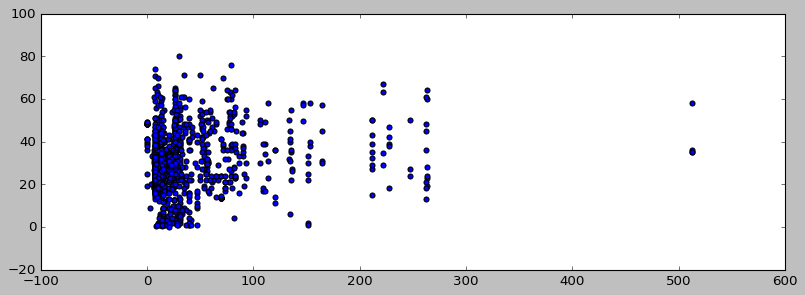

In [148]:
# Method 1 - matplotlib
plt.figure(figsize=(12, 4))
plt.scatter(x=titanic.Fare, y=titanic.Age);

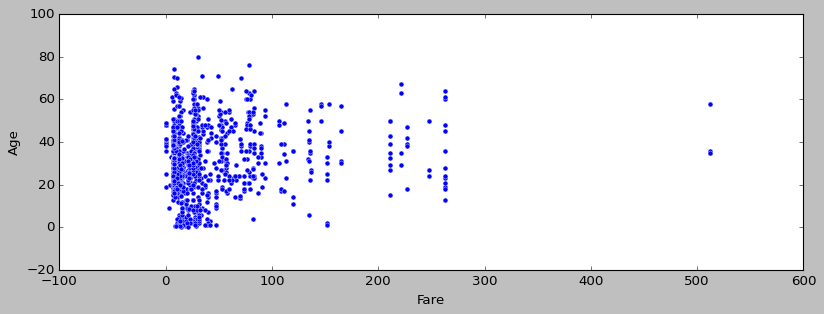

In [149]:
# Method 2 - seaborn
plt.figure(figsize=(12, 4))
sns.scatterplot(x="Fare", y="Age", data=titanic);

#### Plot the correlation matrix using seaborn.

<Axes: >

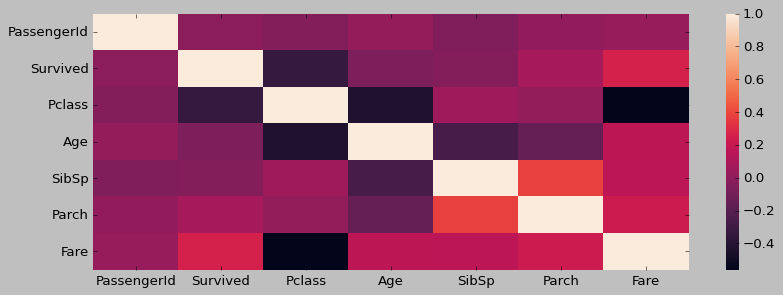

In [150]:
plt.figure(figsize=(12, 4))
corr = titanic.select_dtypes(exclude=object).corr()
sns.heatmap(corr)


#### What are the most correlated features?

In [151]:
"""
The more correlated features are the ones that are near to 0 values, not to 1. So the most correlated data are:
- Fare to Age
- Fare to Passenger class (Pclass)
- Age to Passenger class (Pclass)
- Survival to Passenger class (Pclass)
"""

'\nThe more correlated features are the ones that are near to 0 values, not to 1. So the most correlated data are:\n- Fare to Age\n- Fare to Passenger class (Pclass)\n- Age to Passenger class (Pclass)\n- Survival to Passenger class (Pclass)\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<Axes: xlabel='Age', ylabel='Count'>

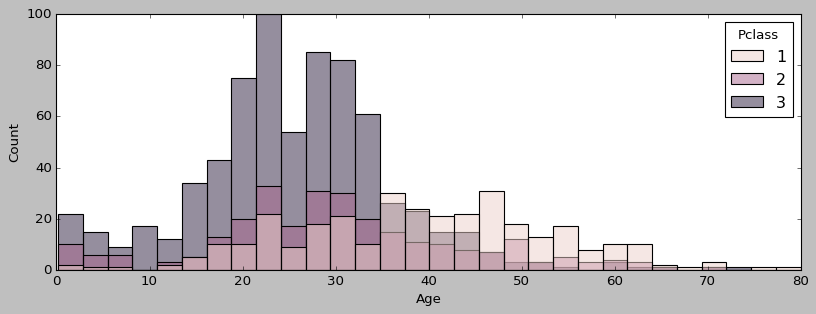

In [153]:
plt.figure(figsize=(12, 4))
sns.histplot(data=titanic, x= "Age", hue="Pclass")

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

<Figure size 960x320 with 0 Axes>

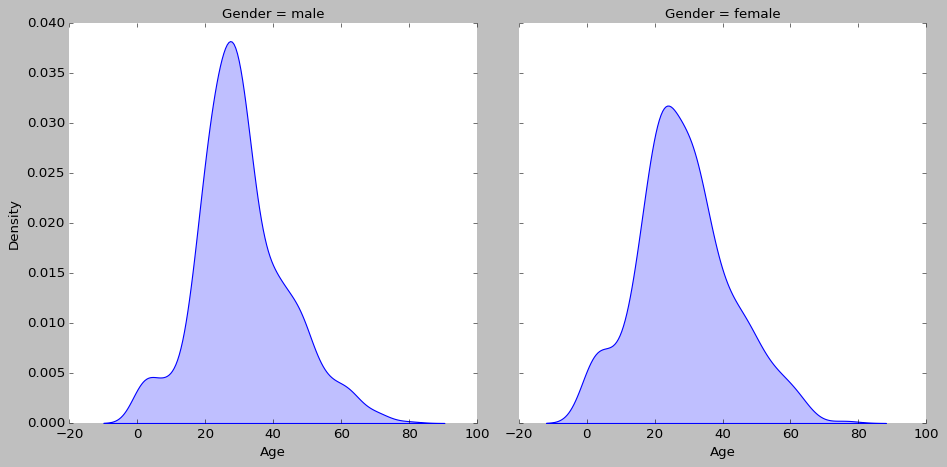

In [154]:
plt.figure(figsize=(12, 4))
grid = sns.FacetGrid(titanic, col='Gender', height=6) 
grid.map(sns.kdeplot, 'Age', fill=True)
sns.despine(left=True, bottom=True)
plt.show()